<a href="https://colab.research.google.com/github/bintangnabiil/Machine_Learning/blob/main/Machine_Learning_Online_Retail_Week_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Buat Model Clustering K-Means dan Agglomerative

##1. Install Package

In [1]:
!pip install openpyxl

##2. Import Libraries

In [20]:
import pandas as pd
import numpy as np
from datetime import timedelta

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns

##3. Load Dataset

In [21]:
file_path = 'Online Retail.xlsx'
df = pd.read_excel(file_path)

##4. Menampilkan Data Awal

In [22]:
print("Dataset shape:", df.shape)
print(df.head())

Dataset shape: (541909, 8)
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


##5. Data Cleaning dan Preprocessing

In [23]:
# Drop missing CustomerID
df = df.dropna(subset=['CustomerID'])

# Hapus transaksi retur dan harga nol
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# Ubah tipe data
df['CustomerID'] = df['CustomerID'].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Tambahkan kolom TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

##6. Hitung RFM

In [24]:
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Tampilkan contoh
print("Contoh data RFM:")
print(rfm.head())

Contoh data RFM:
            Recency  Frequency  Monetary
CustomerID                              
12346           326          1  77183.60
12347             2          7   4310.00
12348            75          4   1797.24
12349            19          1   1757.55
12350           310          1    334.40


##7. Normalisasi (Scaling)

In [26]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


##8. Model K-Means

In [27]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

##9. Model Agglomerative

In [28]:
agg = AgglomerativeClustering(n_clusters=4)
rfm['Agglomerative_Cluster'] = agg.fit_predict(rfm_scaled)

##10. Visualisasi Clustering

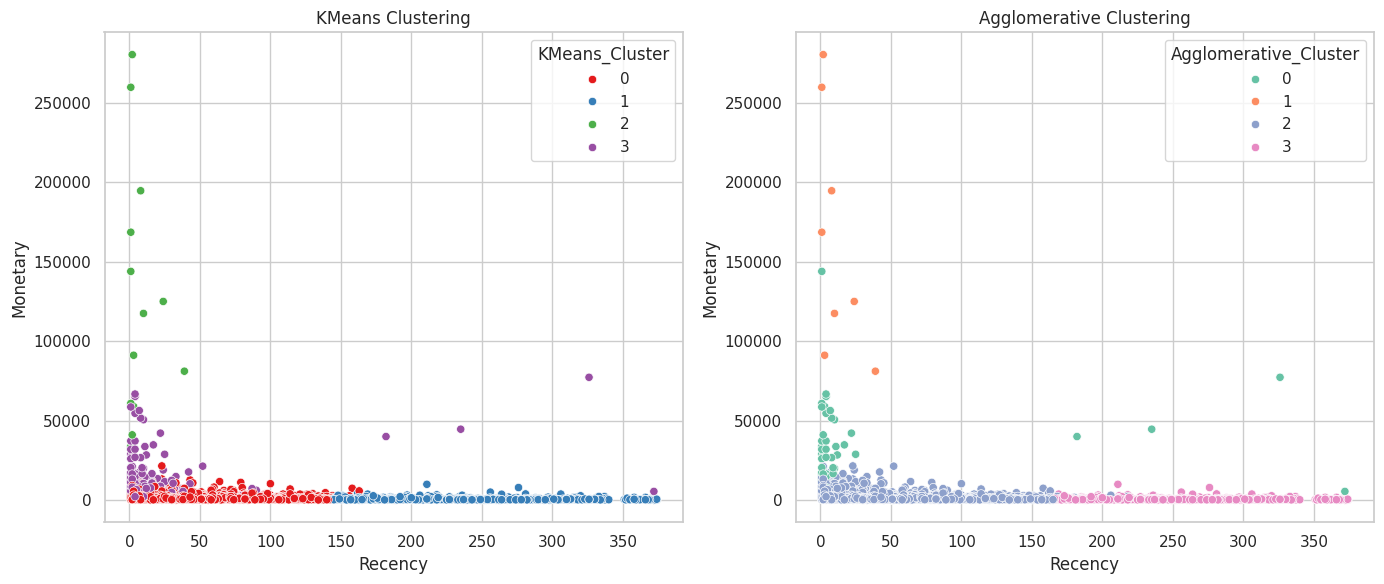

In [29]:
sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

# KMeans
plt.subplot(1, 2, 1)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='KMeans_Cluster', palette='Set1')
plt.title('KMeans Clustering')

# Agglomerative
plt.subplot(1, 2, 2)
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Agglomerative_Cluster', palette='Set2')
plt.title('Agglomerative Clustering')

plt.tight_layout()
plt.show()

#3) Evaluasi Matriks

##1. Elbow Method

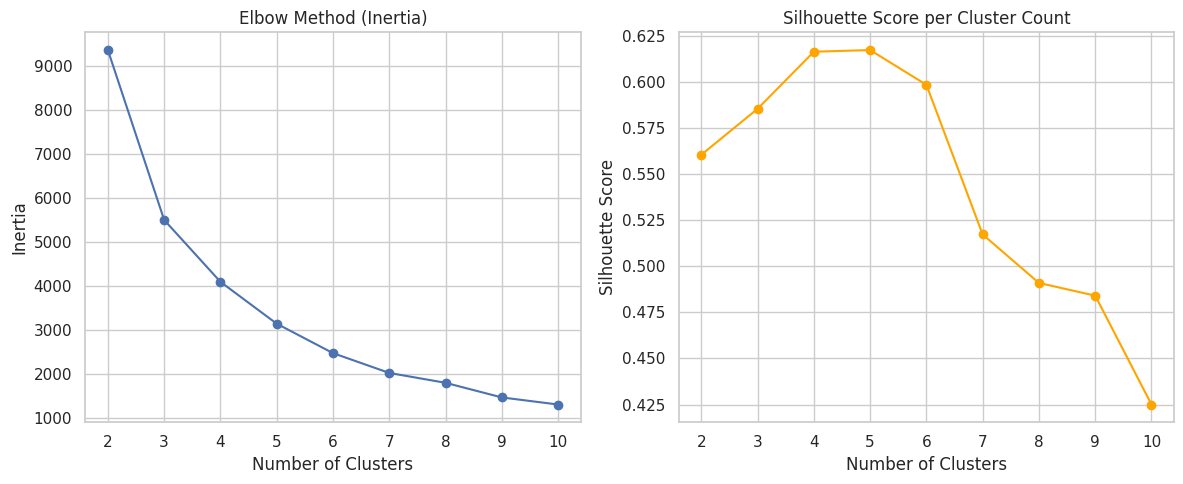

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

inertia = []
silhouette_scores = []

range_n = range(2, 11)

for k in range_n:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(rfm_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, labels))

# Plot Elbow
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range_n, inertia, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# Plot Silhouette
plt.subplot(1, 2, 2)
plt.plot(range_n, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score per Cluster Count')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

##2. Evaluasi Beberapa Matriks

In [31]:
# Hitung metrik evaluasi untuk KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(rfm_scaled)

print("Evaluasi KMeans (k=4):")
print("Silhouette Score:", silhouette_score(rfm_scaled, kmeans_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(rfm_scaled, kmeans_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(rfm_scaled, kmeans_labels))

# Hitung metrik evaluasi untuk Agglomerative
agg = AgglomerativeClustering(n_clusters=4)
agg_labels = agg.fit_predict(rfm_scaled)

print("\nEvaluasi Agglomerative (k=4):")
print("Silhouette Score:", silhouette_score(rfm_scaled, agg_labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(rfm_scaled, agg_labels))
print("Davies-Bouldin Index:", davies_bouldin_score(rfm_scaled, agg_labels))

Evaluasi KMeans (k=4):
Silhouette Score: 0.616212846765192
Calinski-Harabasz Index: 3149.7196984133348
Davies-Bouldin Index: 0.7533624887695072

Evaluasi Agglomerative (k=4):
Silhouette Score: 0.6065329601634818
Calinski-Harabasz Index: 2677.9382739908083
Davies-Bouldin Index: 0.7570399727948356


##3. Dunn Index

In [33]:
from scipy.spatial.distance import cdist, pdist

def dunn_index(X, labels):
    clusters = np.unique(labels)
    n_clusters = len(clusters)

    # Hitung intra-cluster diameter (maks jarak dalam 1 cluster)
    intra_dists = []
    for c in clusters:
        points_in_cluster = X[labels == c]
        if len(points_in_cluster) > 1:
            dist = pdist(points_in_cluster)
            intra_dists.append(np.max(dist))
        else:
            intra_dists.append(0)
    max_intra_dist = np.max(intra_dists)

    # Hitung inter-cluster distance (min jarak antar cluster)
    inter_dists = []
    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            ci = X[labels == clusters[i]]
            cj = X[labels == clusters[j]]
            dist = cdist(ci, cj)
            inter_dists.append(np.min(dist))
    min_inter_dist = np.min(inter_dists)

    # Dunn Index
    if max_intra_dist == 0:
        return 0
    else:
        return min_inter_dist / max_intra_dist

dunn_kmeans = dunn_index(rfm_scaled, kmeans_labels)
print("Dunn Index (KMeans):", dunn_kmeans)

# Untuk Agglomerative
dunn_agg = dunn_index(rfm_scaled, agg_labels)
print("Dunn Index (Agglomerative):", dunn_agg)

Dunn Index (KMeans): 0.0003451683688300811
Dunn Index (Agglomerative): 0.0007707512792255274


##4. Interpretasi Matriks Evaluasi Clustering

|Metrik|Apa yang Diukur?|Cara Kerja|Interpretasi Nilai|Nilai Ideal
|-|-|-|-|-
|Elbow Method|Seberapa besar penurunan inertia saat menambah jumlah cluster|Mengukur within-cluster sum of squares (WSS)|Titik "tekukan" = jumlah cluster optimal|Titik tekukan terlihat
|Silhouette Score|Seberapa baik data dikelompokkan|Rasio antara jarak antar cluster dan dalam cluster|Mendekati 1: cluster bagus, < 0: buruk|Semakin mendekati 1
|Calinski-Harabasz|Rasio antar-cluster scatter ke dalam-cluster scatter|Semakin tinggi = cluster makin padat dan terpisah|Semakin tinggi lebih baik|Semakin besar
|Davies-Bouldin Index|Rata-rata kesamaan antar cluster berdasarkan jarak dan sebaran|Gabungan seberapa padat dan seberapa jauh cluster|Semakin kecil lebih baik|Semakin kecil
|Dunn Index|Rasio jarak minimum antar cluster terhadap diameter maksimum suatu cluster|Gabungan seberapa jauh antar cluster dan seberapa kompak cluster|Semakin besar lebih baik|Semakin besar

##5. Matriks yang Terbaik
##Silhouette Score:
- Mengukur dua aspek sekaligus:

  Mengukur seberapa rapat data dalam satu cluster dan seberapa jauh antar cluster. Ini memberikan gambaran yang cukup lengkap tentang kualitas clustering.
- Nilainya mudah dipahami:
  Hasilnya berada dalam rentang -1 hingga 1.
  - Semakin dekat ke 1 → clustering sangat baik
  - Mendekati 0 → cluster saling tumpang tindih
  - Nilai negatif → data salah tempat (mis-clustered)
- Model-agnostic:
  Bisa digunakan di banyak jenis algoritma clustering (KMeans, Agglomerative, DBSCAN, dll), tidak tergantung pada satu metode saja.
- Didukung oleh banyak library dan tools:
  Tersedia secara langsung di Scikit-learn dan library populer lain, jadi mudah untuk digunakan dalam implementasi nyata.
- Populer dan sering digunakan dalam praktik:
  Banyak paper, tugas kuliah, dan tools analisis data memakai Silhouette sebagai acuan utama, jadi secara akademis juga kuat.

#3) Penjelasan Persamaan Matematika
##1. K-Means Clustering
Tujuan K-Means adalah meminimalkan total jarak kuadrat antara setiap titik dan pusat cluster-nya:
$$
J = \sum_{i=1}^k\sum_{x\in C_i} ||x-μ_i||^2
$$

Keterangan:
- $k$ = jumlah cluster
- $C_i$ = himpunan titik pada cluster ke-$i$
- $μ_i$ = pusat (centroid) dari cluster ke-$i$
- $||x-μ_i||^2$ = jarak kuadrat antara titik $x$ dan centroid-nya<br><br>

##2. Agglomerative Clustering
Metode Hierarchical Clustering ini tidak memiliki satu rumus cost function seperti K-Means. Namun, ide utamanya adalah:
- Awalnya setiap titik adalah 1 cluster
- Gabungkan dua cluster terdekat berdasarkan linkage:

Linkage paling umum digunakan:
- Single Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{min}} ||x-y||
$$
- Complete Lingkage
$$
D(C_i, C_j) = \underset {\text{x ∈ C_i,y ∈ C_j}}{\text{max}} ||x-y||
$$
- Average Linkage
$$
D(C_i, C_j) = \frac{1}{|C_i||C_j|} \sum_{x \in C_i} \sum_{y \in C_j} ||x-y||
$$<br><br>

##3. Inertia / Elbow Method
Tujuannya adalah mencari titik "tekukan" (elbow) saat penambahan cluster tidak menurunkan inertia secara signifikan.
$$
Inertia = \sum_{i=1}^n ||x_i - μ_{c(i)}||^2
$$

Keterangan:
- $x_i$ = titik data ke-$i$
- $μ_{c(i)}$ = centroid dari cluster tempat x_i berada<br><br>

##4. Silhoutte Coefficient
Untuk setiap titik-$i$:
$$
s(i) = \frac{c(i) - a(i)}{max(a(i)), b(i)}
$$

Keterangan:
- $a(i)$ = rata-rata jarak antara $i$ dan semua titik dalam cluster yang sama
- $b(i)$ = jarak terkecil rata-rata dari $i$ ke semua cluster lain
- Nilai $s(i) ]in [-1, 1]$:
  - Dekat dengan 1: sangat cocok dalam clusternya
  - Dekat 0: dekat perbatasan antara dua cluster
  - Negatif: kemungkinan salah cluster<br><br>

##5. Calinski-Harabasz Index
$$
CH = \frac{Tr(B_k)}{Tr(W_k)} \cdot \frac{n-k}{k-1}
$$

Keterangan:
- $TR(B_k)$ = antara-class dispersion (variasi antar cluster)
- $Tr(W_k)$ = within-class dispersion (variasi dalam cluster)
- $n$ = jumlah total data
- $k$ = jumlah cluster

Semakin besar CH Index, semakin bagus pemisahan cluster-nya.<br><br>

##6. Davies-Bouldin Index
$$
DB = \frac{1}{k} \sum_{i=1}^k \underset{j \not= 1}{max} (\frac{\sigma_i + \sigma_j}{d_{ij}})
$$

Keterangan:
- $\sigma_i$ = rata-rata jarak titik dalam cluster $i$ ke centroid-nya
- $d_{ij}$ = jarak antara centroid cluster $i$ dan $j$

Semakin kecil DB Index, semakin baik karena cluster lebih jauh dan lebih rapat.<br><br>

##7. Dunn Index
$$
D = \frac{min_{i \not= j} d(C_i,C_j)}{max_x δ(C_k)}
$$

Keterangan:
- $d(C_i,C_j)$ = jarak minimum antar dua cluster berbeda
- $δ(C_k)$ = diameter maksimum dari cluster $C_k$ (jarak terbesar antara dua titik dalam cluster)
- Semakin Tinggi nilai Dunn Index, semakin baik cluster karena:
  - antar-cluster jauh (besar numerator)
  - intra-cluster rapat (kecil denominator)